This second practical work, on motion estimation, deals with parametric motion estimation. You have to reuse some of the functions you implemented during the first practical work.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from cv2 import BORDER_REPLICATE, copyMakeBorder
from scipy.interpolate import griddata
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

# Parametric estimation

In this second practical work, we will work on parametric estimation, both using direct and indirect methods.

## I - Direct parametric estimation

### I - 1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

Let us suppose that $\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2, b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:

$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Answer**: 

The 2D Discrete-Time Fourier Transform (DTFT) of a signal $a(n, m)$ is defined as:

$$
\hat{a}(\nu_x, \nu_y) = \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} a(n, m) e^{-i2\pi (\nu_x n + \nu_y m)}
$$

Now, let's consider the translated signal $b(n, m) = a(n + c, m + d)$. Substituting $b(n, m)$ into the DTFT expression:

$$
\begin{align*}
\hat{b}(\nu_x, \nu_y) &= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} b(n, m) e^{-i2\pi (\nu_x n + \nu_y m)} \\
&= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} a(n + c, m + d) e^{-i2\pi (\nu_x n + \nu_y m)}
\end{align*}
$$

Now, let's perform a change of variables to express the summations in terms of $n$ and $m$:

$$
\begin{align*}
\hat{b}(\nu_x, \nu_y) &= \sum_{n'=-\infty}^{\infty} \sum_{m'=-\infty}^{\infty} a(n', m') e^{-i2\pi (\nu_x (n' - c) + \nu_y (m' - d))} \\
&= e^{i2\pi (c\nu_x + d\nu_y)} \sum_{n'=-\infty}^{\infty} \sum_{m'=-\infty}^{\infty} a(n', m') e^{-i2\pi (\nu_x n' + \nu_y m')} \\
&= e^{i2\pi (c\nu_x + d\nu_y)} \hat{a}(\nu_x, \nu_y)
\end{align*}
$$

Thus, we have shown that the ratio between the DTFTs is:

$$
\frac{\hat{b}(\nu_x, \nu_y)}{\hat{a}(\nu_x, \nu_y)} = e^{i2\pi (c\nu_x + d\nu_y)}
$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DFT.

Under which hypotheses is the ratio between $b$'s and $a$'s DFT a linear phase signal:

$$
\frac{\hat{B}(k_x,k_y)}{\hat{A}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

**Answer**:

The Discrete Fourier Transform (DFT) of a finite signal $a(n, m)$ defined on a grid of size $N \times N$ is given by:

$$
\hat{A}(k_x, k_y) = \sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}
$$

Similarly, for the signal $b(n, m)$, its DFT is:

$$
\hat{B}(k_x, k_y) = \sum_{n=0}^{N-1} \sum_{m=0}^{N-1} b(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}
$$

To find the condition under which the ratio of their DFTs is a linear phase signal, we need to substitute the expressions for $\hat{A}(k_x, k_y)$ and $\hat{B}(k_x, k_y)$ into the ratio and simplify. We get:

$$
\frac{\hat{B}(k_x, k_y)}{\hat{A}(k_x, k_y)} = \frac{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} b(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}}{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}}
$$

By analyzing the linear phase signal expression, we can infer that signal $b(n, m)$ must be a function of signal $a(n, m)$. Recognizing the similitude between the expression found on the last question, we can check for the case in which $b(n,m) = a(n+c,m+d)$:

\begin{align*}
\frac{\hat{B}(k_x, k_y)}{\hat{A}(k_x, k_y)} &= \frac{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}}{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} b(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}} \\
&= \frac{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n+c,m+d) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}}{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}} \\
&= \frac{\sum_{n'=0}^{N-1} \sum_{m'=0}^{N-1} a(n',m') e^{-\frac{2\pi i}{N}(k_x (n'-c) + k_y (m'-d))}}{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}} \\
&= \frac{e^{\frac{2\pi i}{N}(k_x c + k_y d)}\sum_{n'=0}^{N-1} \sum_{m'=0}^{N-1} a(n',m') e^{-\frac{2\pi i}{N}(k_x n' + k_y m')}}{\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n, m) e^{-\frac{2\pi i}{N}(k_x n + k_y m)}} \\
&= e^{\frac{2\pi i}{N}(k_x c + k_y d)} \\
\end{align*}

Indeed, as the obtained expression is the same for the linear phase signal, we can infer that under the hypothesis $b(n,m) = a(n+c,m+d)$, that is $b(n,m)$ is translation of $a(n,m)$, the ratio between $b$'s and $a$'s DFT is a linear phase signal.

### I - 2 Practical part

First, start to work on the `ball.mat` image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding or not some noise into the image.

In [2]:
# im1 = loadmat("ball.mat")["im1"]
# im1 = im1.astype("float")

im1 = loadmat("lena.mat")["im1"]
im1 = im1.astype("float")

N, M = np.shape(im1)

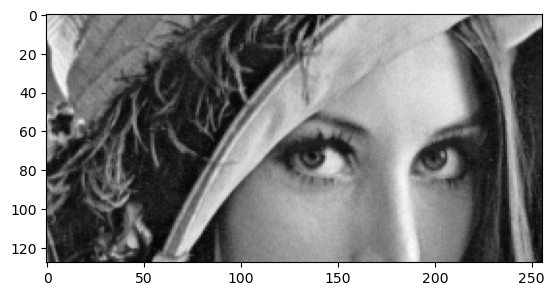

In [3]:
# Potentially add noise to the image

# sigma = 0

sigma = 2

im1 += np.random.normal(0, sigma, im1.shape)

plt.figure()
plt.imshow(im1, cmap="gray")
plt.show()

In the following, we apply a translation to the image. To do that, use the applyAffineMotion function which is already pre-implemented.

In [4]:
def fracMc(ref, mvf, outofbound=20):
    [rows, cols] = np.shape(ref)

    mc_c, mc_r = np.meshgrid(
        np.arange(cols), np.arange(rows)
    )  # Initial coordinates, used to infer the new coordinates

    mc_r_tmp = mc_r + mvf[:, :, 0]  # Row coordinates, after the movement
    mc_c_tmp = mc_c + mvf[:, :, 1]  # Column coordinates, after the movement

    extension = outofbound
    # ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)# Padded image
    ref = cv2.copyMakeBorder(
        ref, extension, extension, extension, extension, cv2.BORDER_REFLECT
    )  # Padded image

    mc_r = (
        mc_r_tmp + extension
    )  # Row coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    mc_c = (
        mc_c_tmp + extension
    )  # Column coordinates, after the movement, in which we want to do the interpolation (in the padded image)

    colMeshGrid, rowMeshGrid = np.meshgrid(
        np.arange(cols + 2 * extension), np.arange(rows + 2 * extension)
    )  # Original coordinates, at which we know the data points

    # Put the input coordinates into the form of an array, to mach scipy format
    points = np.zeros((np.shape(ref)[0] * np.shape(ref)[1], 2))
    points[:, 0] = colMeshGrid.reshape(np.shape(ref)[0] * np.shape(ref)[1])
    points[:, 1] = rowMeshGrid.reshape(np.shape(ref)[0] * np.shape(ref)[1])

    values = ref.reshape(np.shape(ref)[0] * np.shape(ref)[1])

    # Put the coordinates in which we want ot do the interpolation into the form of an array, to mach scipy format
    points_inter = np.zeros((rows * cols, 2))
    points_inter[:, 0] = mc_c.reshape(rows * cols)
    points_inter[:, 1] = mc_r.reshape(rows * cols)

    motcomp = griddata(points, values, points_inter, "linear")

    motcomp = motcomp.reshape(rows, cols)

    return motcomp


def applyAffineMotion(x, b, B=np.zeros((2, 2)), out=100):
    N, M = np.shape(x)
    px, py = np.meshgrid(
        np.arange(-(M - 1) / 2, (M - 1) / 2 + 1),
        np.arange(-(N - 1) / 2, (N - 1) / 2 + 1),
    )

    mvfx = b[0] + B[0, 0] * px + B[0, 1] * py
    mvfy = b[1] + B[1, 0] * px + B[1, 1] * py

    mvf = np.zeros((np.shape(mvfx)[0], np.shape(mvfx)[1], 2))
    mvf[:, :, 1] = mvfx
    mvf[:, :, 0] = mvfy

    y = fracMc(x, mvf, out)

    return y

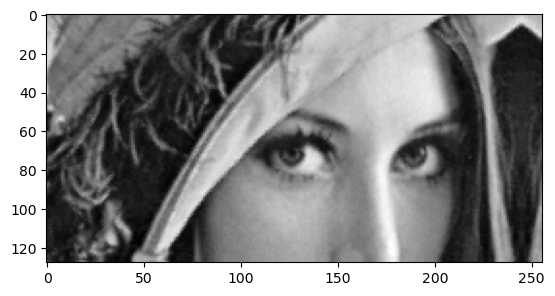

In [5]:
# horiz_displacement = 10.0
# vert_displacement = 1.0

horiz_displacement = 10.5
vert_displacement = 1.5

b = np.array([horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
# B = np.zeros((2,2))

im2 = applyAffineMotion(im1, b)
plt.figure()
plt.imshow(im2, cmap="gray")
plt.show()

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

**Answer:**

With the FFT of the two images, it is possible to obtain the parameters of the translation by analyzing the ratio between `im2`'s and `im1`'s FFT, which we know to be a linear phase signal $e^{i2\pi (c\nu_x + d\nu_y)}$. By defining $\varphi=\angle e^{i2\pi (c\nu_x + d\nu_y)} \Rightarrow \varphi= 2\pi k_x c + 2\pi k_y d$ a linear plane, the parameters can be obtained by taking the slope on each direction and multiplying it by $\frac{1}{2\pi}$.

In [6]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

Compute the phase of the Fourier transform.

In [7]:
def angle2D(x):
    a = np.angle(x)

    b1 = np.unwrap(a, axis=0)
    b2 = np.unwrap(b1, axis=1)
    b3 = np.unwrap(a, axis=0)[:, ::-1]
    b4 = np.unwrap(b3, axis=1)[:, ::-1]

    y = (b2 + b4) / 2.0 / (-2.0 * np.pi)

    return y

In [8]:
phi = angle2D(IM1 / IM2)

Display phi. Is it a linear plane and why?

**Answer:**

By defining $\varphi$ as the angle of the ratio between `im2`'s and `im1`'s FFT: $\varphi=\angle e^{i2\pi (c\nu_x + d\nu_y)} \Rightarrow \varphi= 2\pi k_x c + 2\pi k_y d$ we can notice that it is indeed a linear plane, with slope $2\pi c$ on the direction $x$ and $2\pi d$ on the direction $y$.

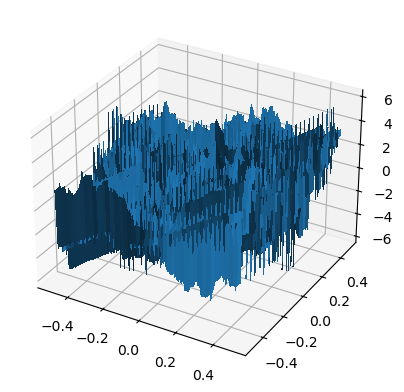

In [9]:
fx, fy = np.meshgrid(
    np.arange(-(M - 1) / 2, (M - 1) / 2 + 1) / M,
    np.arange(-(N - 1) / 2, (N - 1) / 2 + 1) / N,
)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [10]:
def gradient(M, stepX=1.0, stepY=1.0):
    # Computes the gradient of an image, over the rows and the column directions. StepY is the assumed gap between the rows and StepX is the assumed gap between the columns

    gy = np.gradient(M, stepY, axis=0)
    gx = np.gradient(M, stepX, axis=1)

    return gx, gy

In [11]:
gx, gy = gradient(phi, 1 / M, 1 / N)
GX = np.median(gx)
GY = np.median(gy)

In [12]:
print(GX)
print(GY)

7.071109833715823
12.532456772446794


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [13]:
def medianFilter(x, N):
    z = copyMakeBorder(x, N, N, N, N, BORDER_REPLICATE)
    y = np.zeros(np.shape(x))

    for r in range(np.shape(x)[0]):
        for c in range(np.shape(x)[1]):
            tmp = z[r : r + 2 * N + 1, c : c + 2 * N + 1]
            y[r, c] = np.median(tmp)

    return y

In [14]:
phi = phi - phi[int(N / 2 + 2), int(M / 2 + 2)]
t = medianFilter(phi, 1)
A = np.zeros((np.shape(fx)[0] * np.shape(fx)[1], 2))
A[:, 0] = fx.reshape(np.shape(fx)[0] * np.shape(fx)[1])
A[:, 1] = fy.reshape(np.shape(fy)[0] * np.shape(fy)[1])
b = t.reshape(np.shape(t)[0] * np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A), b)

In [15]:
print(bEst)

[ 2.93404115 -0.04989376]


**Answer**:

1. **Median Filter Function (`medianFilter`):**
   - The function `medianFilter(x, N)` takes an input array `x` and a parameter `N`.
   - It first creates an extended array `z` by creating a border around the input array `x` using the function `copyMakeBorder()`, which extends the boundaries of `x` with replicated border pixels.
   - Then, it initializes an output array `y` of of zeros, with the same shape as `x`.
   - It iterates through each pixel of `x`, extracts a local window of size $(2N + 1) \times (2N + 1)$ centered around the current pixel from the extended array `z`, and computes the median value of the pixels in this window.
   - The median value is assigned to the corresponding pixel in the output array `y`.
   - Finally, the function returns the filtered array `y`.

2. **Main Code:**
   - First, we subtract the value at the (approximate) center of the image in `phi` from the entire array `phi`, so that the phase values are relative to the phase of the center of the image (which is now zero).
   - Then, we apply the median filter to the array `phi` with $N = 1$, which means a filter $3 \times 3$, in order to reduce noise and smooth outliers, and assign it to `t`.
   - Next, we initializes a matrix `A` of zeros, with dimensions $\#\text{ pixels} \times 2$.
   - After, we assign the reshaped `fx` array to the first column of `A` and the reshaped `fy` array to the second column of `A`.
   - And subsequently, we reshape the filtered array `t` into a 1D array and assign it to `b`.
   - Finally `bEst = np.dot(np.linalg.pinv(A), b)`: Computes the least squares solution to a linear matrix equation using the pseudo-inverse of `A` and the array `b`, storing the result in `bEst`.

**Relaunch the above code**:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

**Answer**:

- Ball image: Due to the simplicity of the image and its uniform dark texture along the borders, the proposed method demonstrates effectiveness in scenarios with and without noise.
- Lena image: In this scenario, the image complexity complicates the translation process, as it not only involves displacement but also introduces additional information around the borders. Consequently, the method experiences a notable loss of accuracy, yet still provides a reasonable estimate of the translation parameters.

## II - Indirect parametric estimation

In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. **You have to reuse here the functions that you implemented during the first practical work**. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

In [16]:
def initVector(ref, cur):
    """
    Performs an initialization for the first regularizers

    Parameters
    ----------
    ref : np.array
        Reference image.
    cur : np.array
        Reference image.

    Returns
    -------
    pV : np.array (vector of size 2)
        Regularizer for displacement.

    """
    step = 8
    cont = 4 * step

    REF = gaussian_filter(ref, 1.0)  # Unclear how to set sigma
    CUR = gaussian_filter(cur, 1.0)

    CUR = CUR[
        cont + 1 : (np.shape(CUR)[0] - cont) : step,
        cont + 1 : (np.shape(CUR)[1] - cont) : step,
    ]
    SSDMIN = np.inf

    pV = np.zeros(2)

    for globR in range(-cont, cont):
        for globC in range(-cont, cont):
            RR = REF[
                cont + 1 - globR : (cont - globR + np.shape(CUR)[0] * step) : step,
                cont + 1 - globC : (cont - globC + np.shape(CUR)[1] * step) : step,
            ]
            SSD = np.sum((RR - CUR) ** 2)

            if SSD < SSDMIN:
                SSDMIN = SSD
                pV[0] = globR
                pV[1] = globC

    return pV


def computePredictor(r, c, brow, bcol, mvf, ref, cur):
    """
    compute predictor gives the median of the mvf of the blocks :
        - to the left of the current block
        - above the current block
        - upper left of the current block

    If such blocks do not exist due to the border effects, they are not taken into account.

    Parameters
    ----------
    See usage in the me_ssd function

    Returns
    -------
    pV : Median of the mvf of the neighboor blocks
    """
    if r < brow and c < bcol:
        pV = initVector(ref, cur)

    elif r < brow:  # First row
        pV = mvf[r, c - bcol, :]

    elif c < bcol:  # First column
        pV = mvf[r - brow, c, :]

    else:  # Inside
        if c >= np.shape(mvf)[1] - bcol:  # Last column
            vC = mvf[r - brow, c - bcol, :]

        else:  # Not the last column
            vC = mvf[r - brow, c + bcol, :]

        vA = mvf[r, c - bcol, :]
        vB = mvf[r - brow, c, :]

        temp = np.array([vA, vB, vC]).T

        pV = np.median(temp, axis=1)

    pV = pV.ravel()

    return pV


def me_ssd(cur, ref, brow, bcol, search, lamb=0):
    """
    ME BMA full search Motion estimation
    mvf, prediction = me_ssd(cur, ref, brow, bcol, search);

    A regularization constraint can be used
    mvf = me(cur, ref, brow, bcol, search, lambda);
    In this case the function minimize SAD(v) + lambda * error(v)
    where error(v) is the difference between the candidate vector v and the
    median of its avalaible neighbors.

    Code inspired from the one of Marco Cagnazzo


    Parameters
    ----------
    cur : numpy array
        Current (i.e. second) frame of the video.
    ref : numpy array
        Previous (i.e. first) frame of the video.
    brow : int
        Number of rows in each block.
    bcol : int
        Number of rows in each block.
    search : int
        Search radius
    lamb : double
        Regularization parameter

    Returns
    -------
    mvf : numpy array
        Estimated Motion Vector Field (MVF). Horizontal components are on
        index 0 and vertical components are on index 1.
    prediction : numpy array
         Predicted frame based on the motion estimation.
    """

    extension = search

    ref_extended = cv2.copyMakeBorder(
        ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE
    )  # To avoid border effect

    prediction = np.zeros(np.shape(cur))
    lamb *= brow * bcol

    mvf = np.zeros((np.shape(cur)[0], np.shape(cur)[1], 2))

    # Non-regularized search
    if lamb == 0.0:
        # for each block in the current image, find the best corresponding block in the reference image
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                # current block selection
                B = cur[r : r + brow, c : c + brow]  # Block

                # Initialization:
                best_drow, best_dcol = 0, 0
                costMin = np.inf
                Rbest = np.zeros(B.shape)

                # Loop on candidate displacement vectors
                # dcol = candidate displacement vector over the columns
                for dcol in range(c - search, c + search):
                    # drow = candidate displacement vector over the rows
                    for drow in range(r - search, r + search):
                        B_candidate = ref_extended[
                            drow + search : drow + brow + search,
                            dcol + search : dcol + bcol + search,
                        ]
                        cost = np.linalg.norm(B - B_candidate) ** 2

                        # Save the results if they are better than the previous ones
                        if cost < costMin:
                            costMin = cost
                            Rbest = B_candidate
                            best_drow = drow
                            best_dcol = dcol

                # Once the loop is over, save the best row displacement field
                mvf[r : r + brow, c : c + bcol, 0] = r - best_drow
                # Once the loop is over, save the best column displacement field
                mvf[r : r + brow, c : c + bcol, 1] = c - best_dcol
                prediction[r : r + brow, c : c + bcol] = Rbest

    else:  # Regularized search
        # for each block in the current image, find the best corresponding block in the reference image
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                # current block selection
                B = cur[r : r + brow, c : c + bcol]  # Block

                # Initializations
                costMin = np.inf
                Rbest = np.zeros(B.shape)
                best_drow, best_dcol = 0, 0

                # Neighbours : pV is the regularization vector. The regularizer must be such that the estimated displacement is not too far away from pV
                pV = computePredictor(r, c, brow, bcol, mvf, ref, cur)

                # Loop on candidate vectors
                # dcol = candidate displacement vector over the columns
                for dcol in range(c - search, c + search):
                    # rcol = candidate displacement vector over the rows
                    for drow in range(r - search, r + search):
                        B_candidate = ref_extended[
                            drow + search : drow + brow + search,
                            dcol + search : dcol + bcol + search,
                        ]
                        # here, the REGULARIZED cost function
                        cost = (
                            np.linalg.norm(B - B_candidate) ** 2
                            + lamb * np.linalg.norm(np.array([drow, dcol]) - pV) ** 2
                        )

                        # Save the results if they are better than the previous ones
                        if cost < costMin:
                            costMin = cost
                            Rbest = B_candidate
                            best_drow = drow
                            best_dcol = dcol

                # Once the loop is over, save the best row displacement field
                mvf[r : r + brow, c : c + bcol, 0] = r - best_drow
                # Once the loop is over, save the best column displacement field
                mvf[r : r + brow, c : c + bcol, 1] = c - best_dcol
                prediction[r : r + brow, c : c + bcol] = Rbest

    mvf = -mvf  # For compatibility with standards

    return mvf, prediction

def displayMVF(I, mvf, subsamp):
    row, col = np.shape(I)

    # Subsample dense MVF
    vectRow = mvf[0:row:subsamp, 0:col:subsamp, 0]
    vectCol = mvf[0:row:subsamp, 0:col:subsamp, 1]

    # Determine vector origins
    X, Y = np.meshgrid(np.arange(0, col, subsamp), np.arange(0, row, subsamp))
    X = X + np.floor(subsamp / 2.0)
    Y = Y + np.floor(subsamp / 2.0)

    # Show image
    plt.figure(figsize=(16, 9), dpi=80)
    plt.imshow(I, cmap="gray")

    plt.quiver(X, Y, vectCol, -vectRow, color="r")

    plt.show()

    return

def computeDerivatives(im1, im2):
    kernel1D = np.expand_dims(
        (1.0 / 12.0) * np.array([-1.0, 8.0, 0.0, -8.0, 1.0]), axis=1
    ).T
    fx = convolve2d(im1, kernel1D, "same")
    fy = convolve2d(im1, kernel1D.T, "same")
    ft = convolve2d(im1, 0.25 * np.ones((2, 2)), "same") + convolve2d(
        im2, -0.25 * np.ones((2, 2)), "same"
    )
    fx = -fx
    fy = -fy

    return fx, fy, ft


def HS(im1, im2, uInitial, vInitial, alpha=1, ite=100, blur=1.0):
    """
    Horn-Schunck optical flow method.
    Horn, B.K.P., and Schunck, B.G., Determining Optical Flow, AI(17), No. 1-3, August 1981, pp. 185-203 http://dspace.mit.edu/handle/1721.1/6337

    [u, v] = HS(im1, im2, alpha, ite, uInitial, vInitial, displayFlow)

    Parameters
    ----------
    im1, im2 : np.array
        Two subsequent frames or images.
    uInitial, vInitial: np.array
        Initial values for the (u,v) flow. If well initialized, the flow would converge faster and hence would need less iterations.
    alpha : scalar
        A parameter that reflects the influence of the smoothness term.
    ite : int
        Number of iterations.

    Returns
    -------
    u,v : np.array
        Optical flow.
    """

    im1 = gaussian_filter(im1, blur)
    im2 = gaussian_filter(im2, blur)

    # Set initial value for the flow vectors
    u = uInitial.copy()
    v = vInitial.copy()

    # Estimate spatiotemporal derivatives
    fx, fy, ft = computeDerivatives(im1, im2)

    # Averaging kernel
    kernel_1 = np.array(
        [
            [1.0 / 12.0, 1.0 / 6.0, 1.0 / 12.0],
            [1.0 / 6.0, 0.0, 1.0 / 6.0],
            [1.0 / 12.0, 1.0 / 6.0, 1.0 / 12.0],
        ]
    )

    for i in range(ite):
        # Compute local averages of the flow vectors using kernel_1
        uAvg = convolve2d(u, kernel_1)[1:-1, 1:-1]
        vAvg = convolve2d(v, kernel_1)[1:-1, 1:-1]

        # Compute flow vectors constrained by its local average and the optical flow constraints
        u = uAvg - fx * (uAvg * fx + vAvg * fy + ft) / (
            alpha**2 + np.linalg.norm(fx + fy + ft) ** 2
        )
        v = vAvg - fx * (uAvg * fx + vAvg * fy + ft) / (
            alpha**2 + np.linalg.norm(fx + fy + ft) ** 2
        )

    u[np.isnan(u)] = 0
    v[np.isnan(v)] = 0

    return u, v

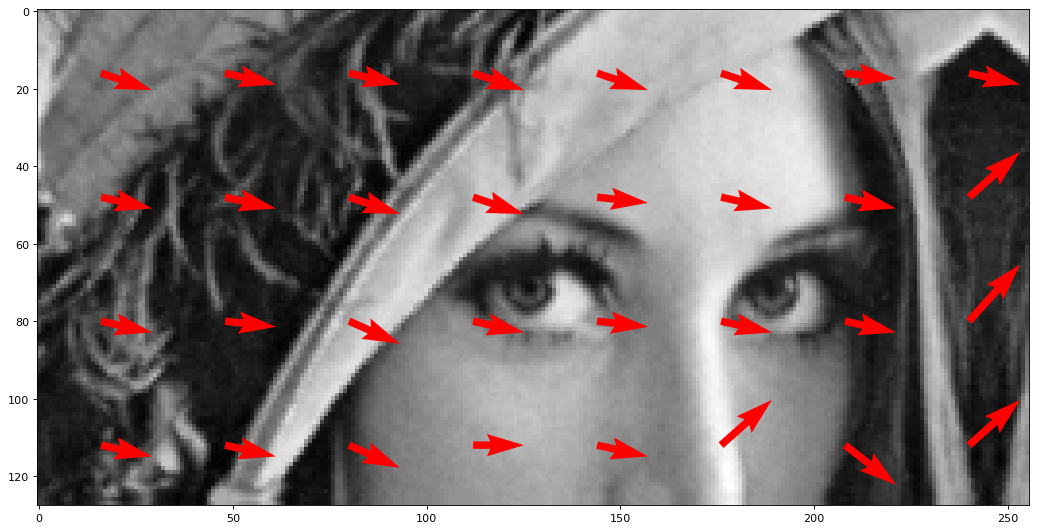

9.0
2.0


In [17]:
lamb = 0
mvf, prediction = me_ssd(im2, im1, 32, 32, 10, lamb)
displayMVF(im2, mvf, 32)
mvf_x = mvf[:, :, 1]
mvf_y = mvf[:, :, 0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

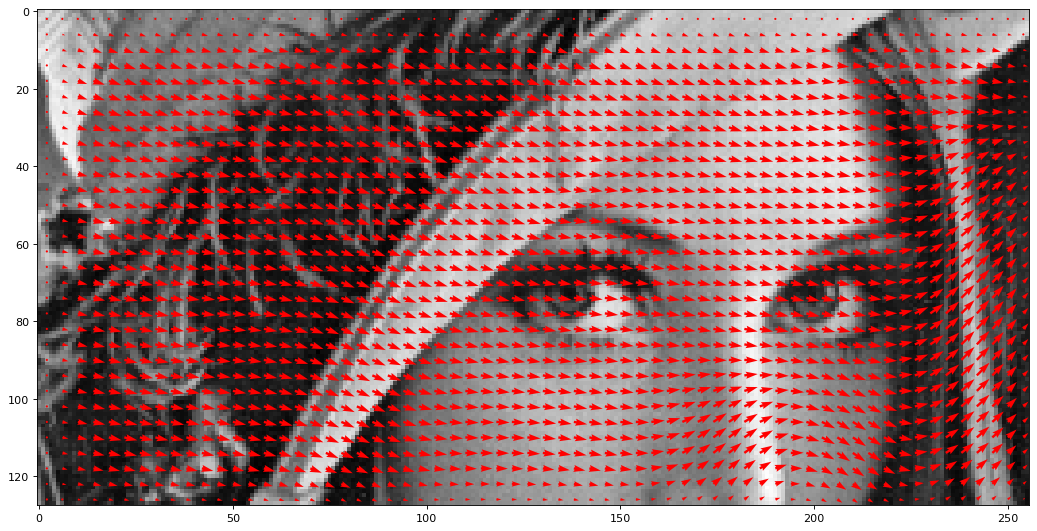

8.97976340046642
1.6942875969560194


In [18]:
alpha = 100
ite = 100
uInitial = mvf[:, :, 1]
vInitial = mvf[:, :, 0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0], np.shape(v)[1], 2))
mvf_hs[:, :, 0] = v
mvf_hs[:, :, 1] = u
displayMVF(im1, mvf_hs, 4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

**Answer**:

- Ball image:
  - Integer translation values: Indirect parametric estimation proves ineffective on the ball image, as anticipated, primarily due to a limitation inherent in the implemented method (as seen in TP1). The approach encounters difficulty particularly in homogenous regions like the dark background or the ball itself. In these areas lacking distinct features, the block matching algorithm faces challenges in identifying the optimal match in the second frame. Consequently, it may arbitrarily assign a block within the search window, resulting in inaccuracies in displacement vectors. Conversely, direct parametric estimation, particularly Method 1, performs reliably across scenarios, regardless of the presence of noise. However, Method 2 shows slightly inferior results, although they remain acceptable overall.
  - Non-integer translation values: Indirect parametric estimation proves ineffective on the ball image. Conversely, among direct parametric estimation methods, Method 1 yields satisfactory results, regardless of the presence of noise. However, Method 2 shows slightly inferior results in the noiseless case and proves ineffective in the scenario with noise.
- Lena image:
  - Integer translation values: For both scenarios, whether with or without noise, indirect parametric estimation algorithms prove effective, showcasing performance on par with Method 1. However, Method 2 shows slightly inferior results, although they remain acceptable overall.
  - Non-integer translation values: For both scenarios, whether with or without noise, indirect parametric estimation algorithms prove effective. However, direct parametric estimation yields significantly worse results in this case.